In [1]:
#importing packages
import os
import numpy as np
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Download the files:
# For reproduceability I have uploaded 3 files into my github, and the fourth I will read from
# Federica's github. 

#1. World firearms murders and ownership - Sheet 1.csv, 
#     from Federica's , originally from: 
#         https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0")
os.system("curl -O https://raw.githubusercontent.com"+
          "/fedhere/PUI2017_fb55/master/HW5_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv")

os.system("mv " + "World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv " 
          + os.getenv("PUIDATA") + "/world_firearms.csv ")

#2. The number of gun owned vs. the number of mass shooting
#     originally from: https://datawrapper.dwcdn.net/pvLFI/4/"
os.system("curl -O https://raw.githubusercontent.com"+
          "/valschi/PUI2017_vjs306/master/HW5_vjs306/rawfiles/data-pvLFI.csv")

os.system("mv " + "data-pvLFI.csv " + os.getenv("PUIDATA") + "/world_shootings.csv ")


#3. The world population
#      originally from:   https://data.worldbank.org/indicator/SP.POP.TOTL
os.system("curl -O https://raw.githubusercontent.com"+
          "/valschi/PUI2017_vjs306/master/HW5_vjs306/rawfiles/API_SP.POP.TOTL_DS2_en_csv_v2.csv")

os.system("mv " + "API_SP.POP.TOTL_DS2_en_csv_v2.csv " + os.getenv("PUIDATA") + "/world_population.csv ")

#4. The world gdp
# .    originally from:   https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
os.system("curl -O https://raw.githubusercontent.com"+
          "/valschi/PUI2017_vjs306/master/HW5_vjs306/rawfiles/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv")

os.system("mv " + "API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv " + os.getenv("PUIDATA") + "/world_gdp.csv ")

#manage files in PUIdata
#code goes here


0

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

** VALERIA's HOMEWORK **

*based from:*

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**





** Investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP **

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [3]:
#Reading the csv's from prepopulated names
df_firearms = pd.read_csv(os.getenv("PUIDATA") + "/" + 'world_firearms.csv')
df_shootings = pd.read_csv(os.getenv("PUIDATA") + "/" + 'world_shootings.csv')
df_pop = pd.read_csv(os.getenv("PUIDATA") + "/" + 'world_population.csv', skiprows=[0,1,2,3])
df_gdp = pd.read_csv(os.getenv("PUIDATA") + "/" + 'world_gdp.csv',  skiprows=[0,1,2,3])

#droping the extra columns and renaming for convention

df_firearms.drop(['ISO code','Source','Homicide by firearm rate per 100,000 pop',
                  'Rank by rate of ownership','% of homicides by firearm',
                 'Average firearms per 100 people'], axis=1,inplace = True)
df_firearms = df_firearms.rename(columns={'Country/Territory': 'Country'})
df_pop = df_pop[['Country Name','2012']]
df_pop = df_pop.rename(columns={'2012': 'Population in 2012','Country Name':'Country'})
df_gdp = df_gdp[['Country Name', '2012']]
df_gdp = df_gdp.rename(columns={'2012': 'gdp in 2012','Country Name':'Country'})

In [4]:
#one dataframe to rule them all

df_a = pd.merge(df_firearms, df_shootings, on="Country")
df_b = pd.merge(df_a, df_pop, on="Country")
df_all = pd.merge(df_b, df_gdp, on="Country")
df_all.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,Population in 2012,gdp in 2012
0,Australia,30.0,3050000.0,15.0,4,22728254.0,1.538194e+12
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.074516e+11
2,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12
3,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11
4,Finland,24.0,2400000.0,45.3,2,5413971.0,2.567065e+11


In [5]:
#Below original Federica's code, I am going to comment as it will error out
#df_ = df_.merge(ms, right_on="Country", left_on="Country Name")
#df_.head()

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


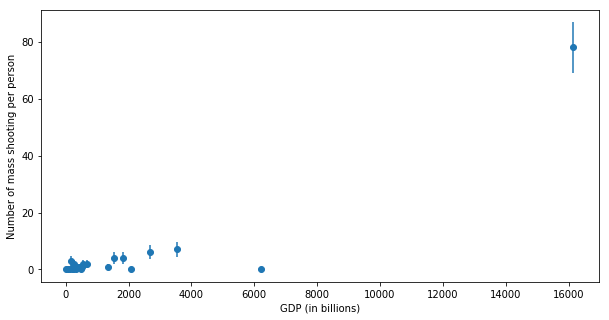

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [6]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_all['gdp in 2012'] / 1e9, df_all['Number of mass shootings'])
ax.errorbar(df_all['gdp in 2012'] / 1e9, df_all['Number of mass shootings'], 
            yerr = np.sqrt(df_all['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

In [7]:
#Federica's original code,  commented

#fig = pl.figure(figsize=(10,5)) 
#ax = fig.add_subplot(111)

#scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
#ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
#            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
#ax.set_xlabel("GDP (in billions)")
#ax.set_ylabel("Number of mass shooting per person")
#ax.set_ylim()
#pl.show()
#print ("Number of mass shooting vs GDP, " + 
#       "errors represent Poisson statistics.\n" + 
#       "The datapoint to the top right of the plot is the USA, " + 
#       "which has noth the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

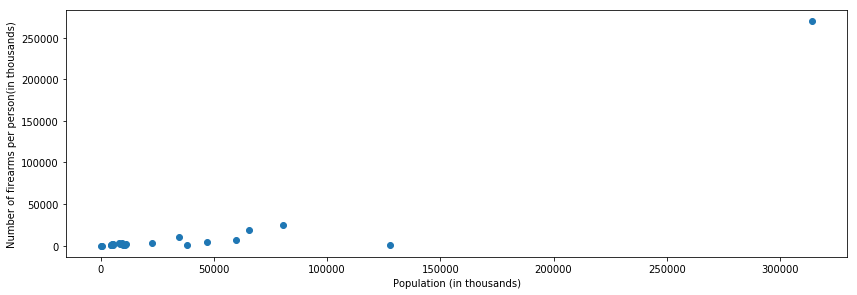

Number of firearms vs population, The datapoint to the top right of the plot is, again, the USA, which has both the highest Population and the highest number of firearms


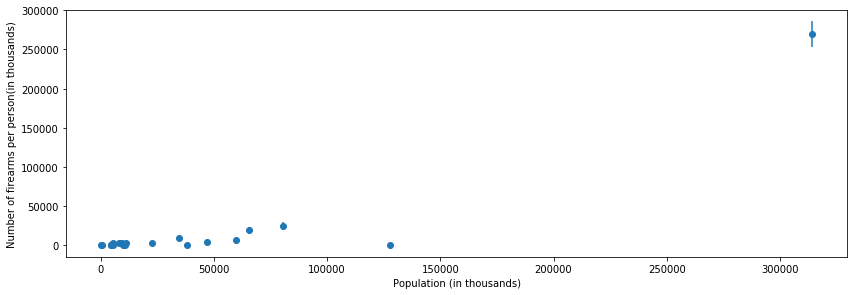

Number of firearms vs population, errors represent Poisson statistics.
The datapoint to the top right of the plot is, again, the USA, which has both the highest Population and the highest number of firearms


In [8]:
#df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

#WITHOUT ERROR:
fig = pl.figure(figsize=(14,10)) 
ax = fig.add_subplot(211)

scatter = ax.scatter(df_all['Population in 2012'] / 1000, df_all['Average total all civilian firearms']/1000)
ax.set_xlabel("Population (in thousands)")
ax.set_ylabel("Number of firearms per person(in thousands)")
ax.set_ylim()
pl.show()
print ("Number of firearms vs population, " + 
       "The datapoint to the top right of the plot is, again, the USA, " + 
       "which has both the highest Population and the highest number of firearms")


#WITH ERROR:
fig = pl.figure(figsize=(14,10)) 
ax = fig.add_subplot(212)

scatter = ax.scatter(df_all['Population in 2012'] / 1000, df_all['Average total all civilian firearms']/1000)
ax.errorbar(df_all['Population in 2012'] / 1000, df_all['Average total all civilian firearms']/1000, 
            yerr = np.sqrt(df_all['Average total all civilian firearms'] * 1.0), fmt = '.')
ax.set_xlabel("Population (in thousands)")
ax.set_ylabel("Number of firearms per person(in thousands)")
ax.set_ylim()
pl.show()
print ("Number of firearms vs population, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is, again, the USA, " + 
       "which has both the highest Population and the highest number of firearms")




## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

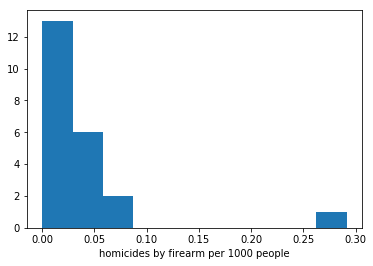

In [14]:
fig, ax = pl.subplots()
ax.hist(df_all['Number of homicides by firearm'] / df_all['Population in 2012'] * 10000)
ax.set_xlabel('homicides by firearm per 1000 people');
pl.show()
#QUESTION FOR OFFICE HOURS: WHAT IS THIS ? 

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


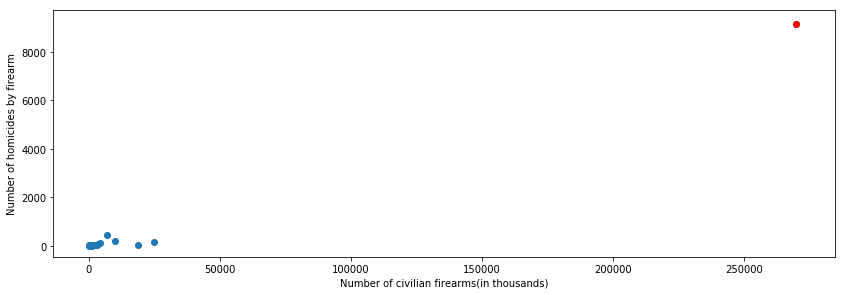

Number of homicides by firearm vs number of civilian firearms, The datapoint to the top right of the plot is, again, the USA, which has clearly the highest number of civilians with firearms, and also the highest number of homicides by firearms


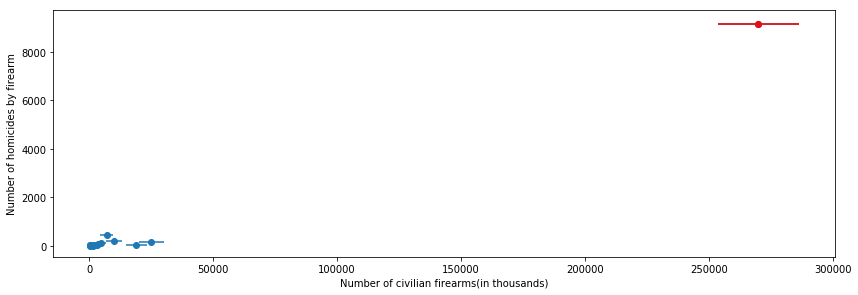

Number of homicides by firearm vs number of civilian firearms, errors represent Poisson statistics.
The datapoint to the top right of the plot is, again, the USA, which has clearly the highest number of civilians with firearms, and also the highest number of homicides by firearms


In [9]:
#WITHOUT ERROR:
fig = pl.figure(figsize=(14,10)) 
ax = fig.add_subplot(211)

scatter = ax.scatter(df_all['Average total all civilian firearms'] / 1000, df_all['Number of homicides by firearm'])
USscatter = ax.scatter(df_all['Average total all civilian firearms'][21] / 1000, df_all['Number of homicides by firearm'][21],c='r')
ax.set_xlabel("Number of civilian firearms(in thousands)")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs number of civilian firearms, " + 
       "The datapoint to the top right of the plot is, again, the USA, " + 
       "which has clearly the highest number of civilians with firearms, "+
       "and also the highest number of homicides by firearms")


#WITH ERROR:
fig = pl.figure(figsize=(14,10)) 
ax = fig.add_subplot(212)

scatter = ax.scatter(df_all['Average total all civilian firearms'] / 1000, df_all['Number of homicides by firearm'])
USscatter = ax.scatter(df_all['Average total all civilian firearms'][21] / 1000, df_all['Number of homicides by firearm'][21],c='r')
ax.errorbar(df_all['Average total all civilian firearms'] / 1000, df_all['Number of homicides by firearm'], 
            xerr = np.sqrt(df_all['Average total all civilian firearms'] * 1.0), fmt = '.')
ax.errorbar(df_all['Average total all civilian firearms'][21] / 1000, df_all['Number of homicides by firearm'][21], 
            xerr = np.sqrt(df_all['Average total all civilian firearms'][21] * 1.0), fmt = '.',c='r')
ax.set_xlabel("Number of civilian firearms(in thousands)")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is, again, the USA, " + 
       "which has clearly the highest number of civilians with firearms, "+
       "and also the highest number of homicides by firearms")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


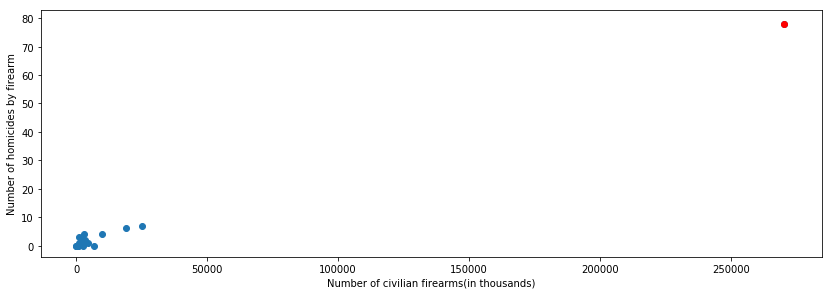

Number of mass shootings vs number of civilian firearms, The datapoint to the top right of the plot is, again, the USA, which has clearly the highest number of civilians with firearms, and also the highest number of Mass shootings


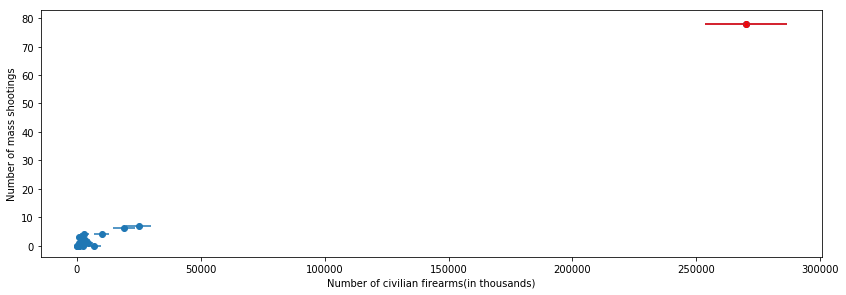

Number of mass shootings vs number of civilian firearms, errors represent Poisson statistics.
The datapoint to the top right of the plot is, again, the USA, which has clearly the highest number of civilians with firearms, and also the highest number of mass shootings


In [10]:
#WITHOUT ERROR:
fig = pl.figure(figsize=(14,10)) 
ax = fig.add_subplot(211)

scatter = ax.scatter(df_all['Average total all civilian firearms'] / 1000, df_all['Number of mass shootings'])
USscatter = ax.scatter(df_all['Average total all civilian firearms'][21] / 1000, df_all['Number of mass shootings'][21],c='r')
ax.set_xlabel("Number of civilian firearms(in thousands)")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs number of civilian firearms, " + 
       "The datapoint to the top right of the plot is, again, the USA, " + 
       "which has clearly the highest number of civilians with firearms, "+
       "and also the highest number of Mass shootings")


#WITH ERROR:
fig = pl.figure(figsize=(14,10)) 
ax = fig.add_subplot(212)

scatter = ax.scatter(df_all['Average total all civilian firearms'] / 1000, df_all['Number of mass shootings'])
USscatter = ax.scatter(df_all['Average total all civilian firearms'][21] / 1000, df_all['Number of mass shootings'][21],c='r')
ax.errorbar(df_all['Average total all civilian firearms'] / 1000, df_all['Number of mass shootings'], 
            xerr = np.sqrt(df_all['Average total all civilian firearms'] * 1.0), fmt = '.')
ax.errorbar(df_all['Average total all civilian firearms'][21] / 1000, df_all['Number of mass shootings'][21], 
            xerr = np.sqrt(df_all['Average total all civilian firearms'][21] * 1.0), fmt = '.',c='r')
ax.set_xlabel("Number of civilian firearms(in thousands)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is, again, the USA, " + 
       "which has clearly the highest number of civilians with firearms, "+
       "and also the highest number of mass shootings")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [11]:
df_all.columns

Index([u'Country', u'Number of homicides by firearm',
       u'Average total all civilian firearms', u'Guns/100 inhabitants',
       u'Number of mass shootings', u'Population in 2012', u'gdp in 2012'],
      dtype='object')

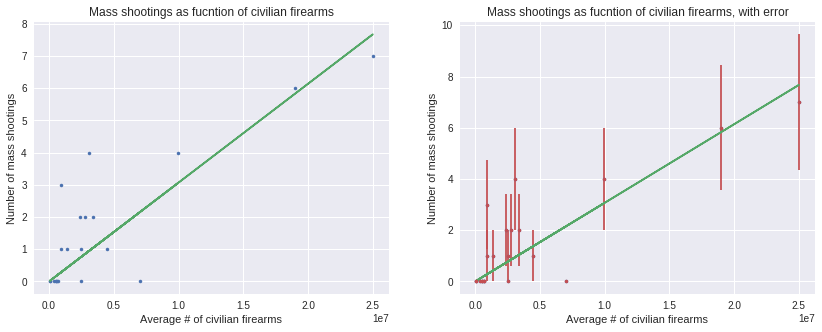

In [61]:
import statsmodels.api as sm

fig = pl.figure(figsize=(14,5)) 
ax = fig.add_subplot(121)

x = df_all['Average total all civilian firearms'][:21]
y = df_all['Number of mass shootings'][:21]

linmodel = sm.OLS(y,x).fit()
linmodel.fittedvalues;

pl.plot(x,y,'.')
pl.plot(x,linmodel.fittedvalues,'-')

pl.title("Mass shootings as fucntion of civilian firearms")
pl.xlabel("Average # of civilian firearms")
pl.ylabel("Number of mass shootings")


###################### 

ax1 = fig.add_subplot(122)

pl.plot(x,y,'.')
pl.plot(x,linmodel.fittedvalues,'-')

pl.errorbar(x,y,yerr=np.abs(y)**0.5, fmt='.')

pl.title("Mass shootings as fucntion of civilian firearms, with error")
pl.xlabel("Average # of civilian firearms")
pl.ylabel("Number of mass shootings")

pl.show()




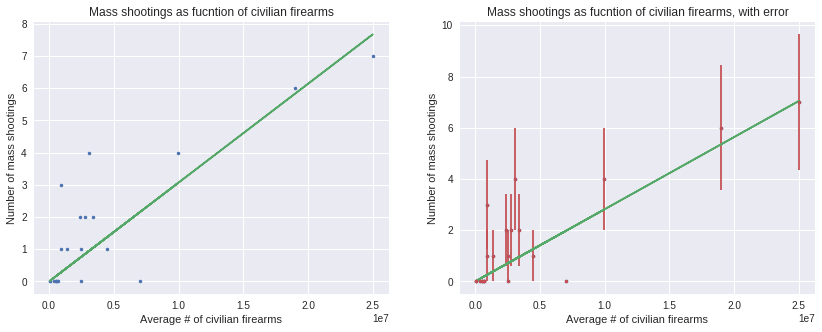

In [59]:
#WLS 
fig = pl.figure(figsize=(14,5)) 

ax = fig.add_subplot(121)

x = df_all['Average total all civilian firearms'][:21]
y = df_all['Number of mass shootings'][:21]

#wmodel = sm.WLS(endog=y,exog=sm.add_constant(x),weights=1.0/yerr).fit()

yerr=np.abs(y)**0.5

linmodelW = sm.WLS(y,x,weights=1.0/(yerr+1)).fit()
linmodelW.fittedvalues;

pl.plot(x,y,'.')
pl.plot(x,linmodel.fittedvalues,'-')

pl.title("Mass shootings as fucntion of civilian firearms")
pl.xlabel("Average # of civilian firearms")
pl.ylabel("Number of mass shootings")
#ax.set_ylim()
#print ("ddd")

###################### 

ax1 = fig.add_subplot(122)

x = df_all['Average total all civilian firearms'][:21]
y = df_all['Number of mass shootings'][:21]

linmodelW = sm.WLS(y,x,weights=1.0/(yerr+1)).fit()
linmodelW.fittedvalues;

pl.plot(x,y,'.')
pl.plot(x,linmodelW.fittedvalues,'-')

pl.errorbar(x,y,yerr=np.abs(y)**0.5, fmt='.')

pl.title("Mass shootings as fucntion of civilian firearms, with error")
pl.xlabel("Average # of civilian firearms")
pl.ylabel("Number of mass shootings")
#ax.set_ylim()
pl.show()

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



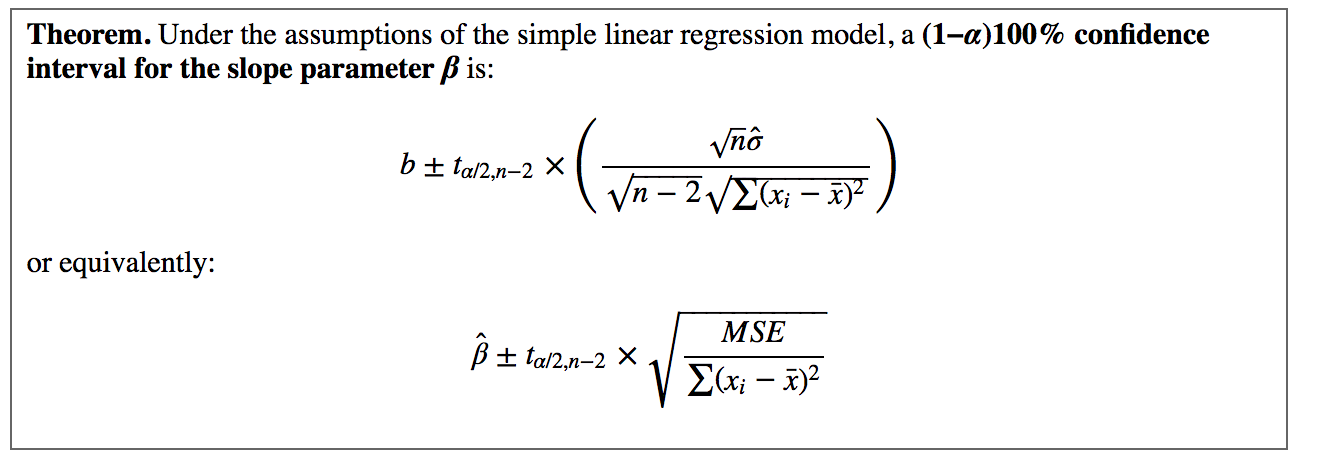

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

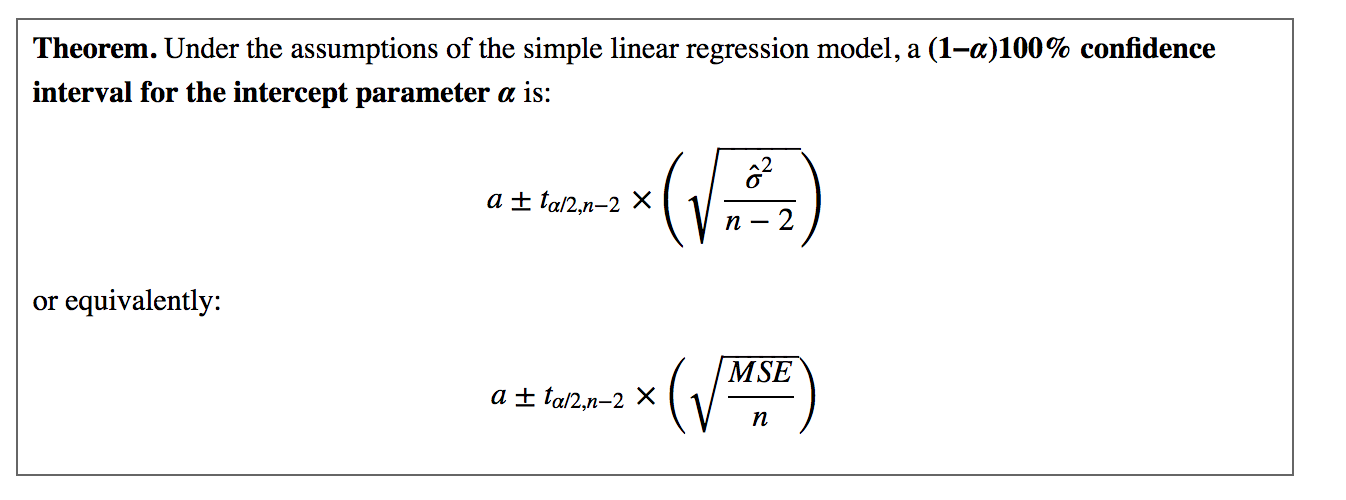

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

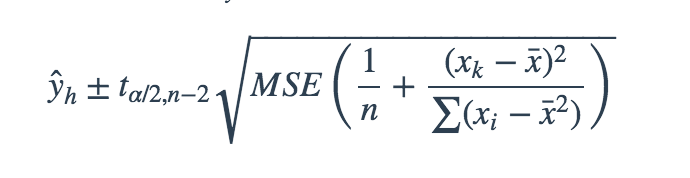

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

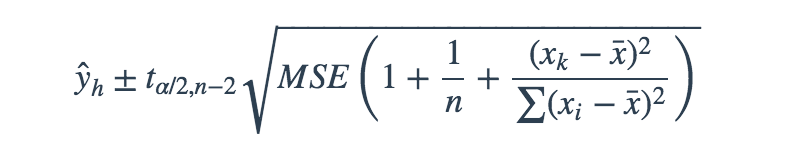

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

# SEABORN

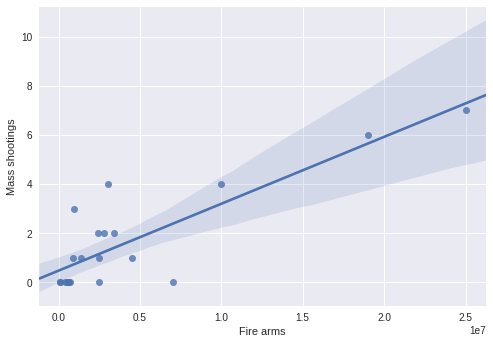

In [47]:
pl.figure()
import seaborn  as sns
sns.regplot(x,y, data=df_all);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

# Polyfit

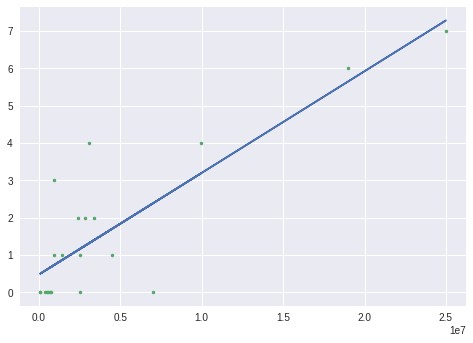

In [69]:
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html

polyfit = numpy.polyfit(x, y, deg=1, rcond=None, full=False, w=None, cov=False)

polyfit_y = polyfit[0]*x+polyfit[1]

pl.plot(x,polyfit_y)
pl.plot(x,y,'.')


## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

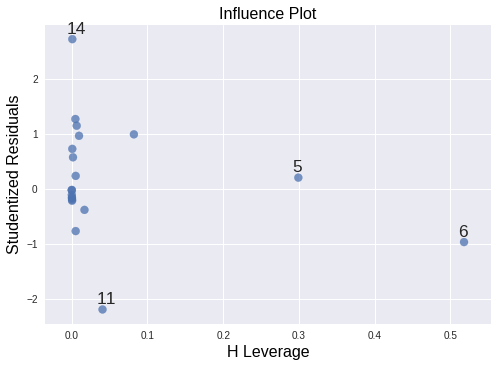

In [53]:
sm.graphics.influence_plot(linmodel, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings